#**Analyzing Demand Forecasting Model**

Below is a comprehensive and well-structured description of the `Demand Forecasting` intended to give a clear and thorough understanding of its purpose, contents, and functionality. The notebook focuses on demand forecasting within a retail or sales context, utilizing the dataset `train.csv` for data preprocessing, training a Random Forest Regressor, and assessing the model’s performance. Each cell in the notebook is explained in detail, describing its code, objective, output, and role in the overall workflow.

**Purpose:** To build and evaluate a machine learning model for predicting sales demand.
**Dataset:** train.csv, containing 150,150 rows and 9 columns:
- `record_ID:` Unique identifier (integer).
- `week:` Date in `DD/MM/YY` format (string).
- `store_id:` Store identifier (integer).
- `sku_id:` Product identifier (integer).
- `total_price:` Final price paid (float).
- `base_price:` Original price before discounts (float).
- `is_featured_sku:` Binary (0/1) for featured products.
- `is_display_sku:` Binary (0/1) for prominently displayed products.
- `units_sold:` Target variable, number of units sold (integer).

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv('train.csv')

#**Details:**
- The file `train.csv` is assumed to be accessible in the Colab environment.
- The dataset contains `150,150 rows` and `9 columns`, representing weekly sales data across multiple stores and products.
- Role in Workflow: Initializes the dataset for subsequent preprocessing and modeling.

In [4]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


## Preprocesses the week column by splitting the date string (format: DD/MM/YY) into three new columns: day, month, and year.
**Details:**
- The week column contains dates (e.g., 17/01/11).
- str.split('/', expand=True) splits each date at the / delimiter, creating a new DataFrame with three columns.
- These are assigned to df[['day', 'month', 'year']], adding them to the original DataFrame.
- Example:
- `17/01/11` → `day="17"`, `month="01"`, `year="11"`.
- `09/07/13` → `day="09"`, `month="07"`, `year="13"`.
- **Role in Workflow:** Enables temporal feature engineering, allowing the model to capture patterns related to specific days, months, or years.

In [5]:
df [['day', 'month', 'year']] = df ['week'].str.split('/',expand=True)

In [6]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [7]:
df = df.drop(['week'], axis=1)

In [8]:
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


# **Data Splitting and Preparation for Model Training**
- **`RandomForestRegressor`**
This is a machine learning model from scikit-learn used for regression tasks. It builds an ensemble of decision trees and averages their predictions to improve accuracy and reduce overfitting.
- **`train_test_split`**
This function helps split your dataset into training and testing sets. It ensures we can evaluate our model on unseen data.
- `X` → This contains all the input features used for predicting sales. We drop the target column (units_sold) from the DataFrame.

- `y`→ This is our target variable, i.e. the number of units sold, which we want our model to predict.

- `X_train / y_train` → Data used to train the model (80% of the dataset).

- `X_test / y_test` → Data used to test the model’s performance on unseen data (20% of the dataset).

- `test_size=0.2` → Keeps 20% of the data for testing.

- `random_state=42` → Ensures reproducibility; the split will be the same each time you run the code.

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X , y = df.drop('units_sold', axis=1) , df['units_sold']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

- `RandomForestRegressor` → Initializes the Random Forest regression model.

 - `n_jobs=-1` → Tells the model to use all available CPU cores for faster training.

- `model.fit(X_train, y_train)` → Trains the Random Forest on the training data so it can learn the relationship between the input features and the target variable (`units_sold`).



In [10]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [11]:
model.score(X_test, y_test)

0.7769989891518266

In [12]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

27.04985121461116

In [13]:
df.units_sold.describe()

,units_sold
count,150150.000000
mean,51.674206
std,60.207904
min,1.000000
25%,20.000000
50%,35.000000
75%,62.000000
max,2876.000000


<Axes: >

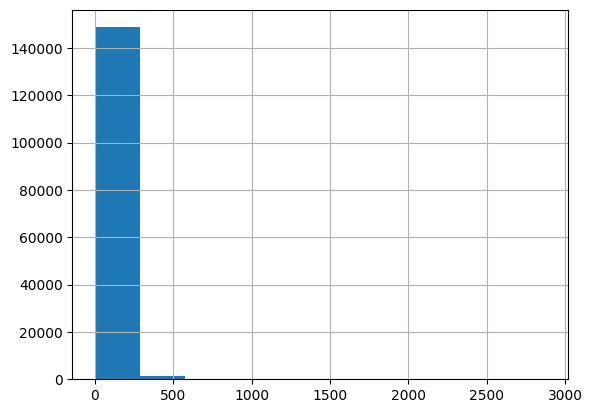

In [14]:
df.units_sold.hist()

This scatter plot shows `predicted values vs. actual values` for a regression model. The `red diagonal line` represents `perfect predictions`. While many `blue dots are close to the line at lower values`, there’s a `noticeable spread as values increase`. Some predictions deviate significantly—either much higher or lower than actual values, especially for large outputs. This shows the model struggles with higher values, leading to under-predictions and over-predictions. Overall, it indicates the model has `less accuracy and higher error variance`, particularly in the upper range.

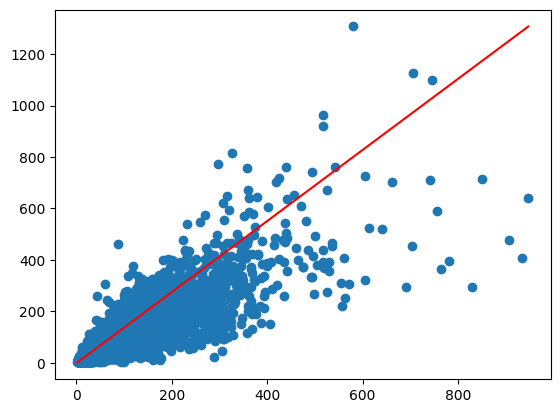

In [15]:
plt.scatter(y_pred, y_test)
plt.plot(
    np.linspace(y_pred.min(), y_pred.max()),
    np.linspace(y_test.min(), y_test.max()),
    color='red'
)

These histograms below show how each feature in the dataset is distributed. **`record_ID`** appears uniformly spread, likely just an identifier. **`store_id`** and **`sku_id`** show clustered or skewed patterns, suggesting categorical behavior. **`total_price, base_price`**, and **`units_sold`** are **`right-skewed`**, meaning most values are low with a few high extremes. The binary features **`is_featured_sku`** and **`is_display_sku`** are highly imbalanced, with mostly zeros. Overall, the plots highlight skewness, imbalance, and the need for possible data transformations before modeling.



array([[<Axes: title={'center': 'record_ID'}>,
        <Axes: title={'center': 'store_id'}>,
        <Axes: title={'center': 'sku_id'}>],
       [<Axes: title={'center': 'total_price'}>,
        <Axes: title={'center': 'base_price'}>,
        <Axes: title={'center': 'is_featured_sku'}>],
       [<Axes: title={'center': 'is_display_sku'}>,
        <Axes: title={'center': 'units_sold'}>, <Axes: >]], dtype=object)

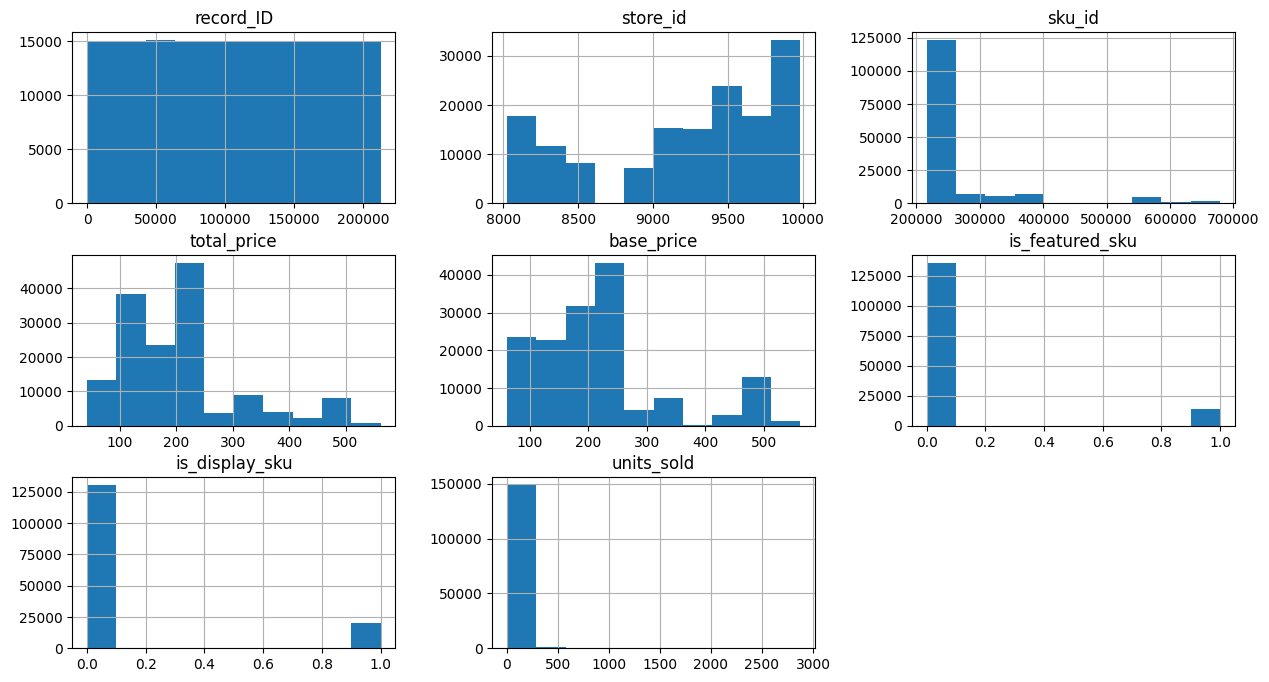

In [16]:
df.hist(figsize=(15,8))

In [17]:
df = df.drop('record_ID', axis=1)

In [18]:
len(df.store_id.unique())

76

In [19]:
len(df.sku_id.unique())

28

In [20]:
df.units_sold.describe()

,units_sold
count,150150.000000
mean,51.674206
std,60.207904
min,1.000000
25%,20.000000
50%,35.000000
75%,62.000000
max,2876.000000


In [21]:
df = df[df.units_sold < df.units_sold.quantile(0.99)]
df

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [22]:
pd.get_dummies(df.store_id, prefix='store')

,store_8023,store_8058,store_8063,store_8091,store_8094,store_8095,store_8121,store_8218,store_8222,store_8317,...,store_9872,store_9876,store_9879,store_9880,store_9881,store_9890,store_9909,store_9954,store_9961,store_9984
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
150146,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
150147,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
150148,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [23]:
# One-hot encode store_id
df = df.join(pd.get_dummies(df['store_id'], prefix='store'))
df.drop('store_id', axis=1, inplace=True)

# One-hot encode sku_id
df = df.join(pd.get_dummies(df['sku_id'], prefix='item'))
df.drop('sku_id', axis=1, inplace=True)

# Display the updated DataFrame
df

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,...,False,False,False,False,False,False,True,False,False,False


In [24]:
model = RandomForestRegressor(n_jobs=-1)
X, y = df.drop('units_sold', axis=1), df['units_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [26]:
model.score(X_train, y_train)

0.9752581597078571

In [27]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

17.826390749528375

This scatter plot also compares `predicted vs. actual values`, with the `red diagonal line` again showing `perfect predictions`. In this case, the blue dots are more tightly clustered around the line throughout the range. This tighter grouping shows the model is more accurate and performs more consistently, even at higher values. While a bit of scatter is still present, it’s less extreme than in the first plot. This means the second model has `better predictive performance`, with `lower error and improved reliability`, especially on `larger values`.

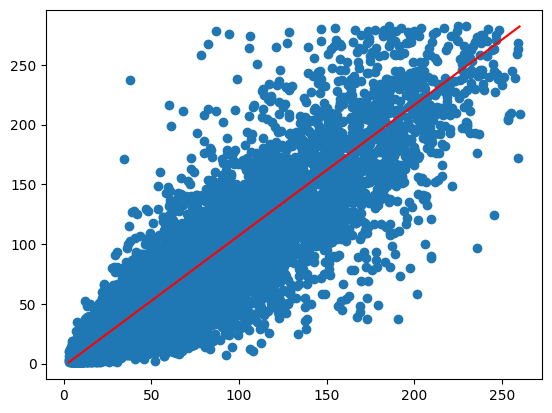

In [28]:
plt.scatter(y_pred, y_test)
plt.plot(
    np.linspace(y_pred.min(), y_pred.max()),
    np.linspace(y_test.min(), y_test.max()),
    color='red'
)

# Performs hyperparameter tuning for a Random Forest Regressor using `GridSearchCV` to find the optimal combination of parameters.
- **Details:**
- Imports: `GridSearchCV` from `sklearn.model_selection` for hyperparameter optimization.
- **Parameter Grid:**
- `**n_estimators:**` Number of trees in the Random Forest, tested with [10, 20].
- `**min_samples_split:**` Minimum samples required to split a node, tested with [2, 4].
- This creates 4 combinations (2 × 2).
- **Model:** Initializes a `RandomForestRegressor` with default parameters (to be overridden by the grid search).
- **GridSearchCV Configuration:**
- `estimator:` The Random Forest model.
- `param_grid:` Dictionary of parameters to test.
- `cv=2:` Uses 2-fold cross-validation.
- `verbose=2:` Displays detailed progress for each fit.
- **Training:**
- Fits the model on `X_train` (features) and `y_train` (target: `units_sold`).
- Note: `X_train` and `y_train` are not defined in the provided code, implying prior data splitting (e.g., via `train_test_split`).
- **Execution:** Tests 4 parameter combinations across 2 folds (8 fits total).
- **Role in Workflow:** Optimizes the Random Forest model to maximize performance (using R² score by default).
- **Output:**
- Console output showing fit progress and timings (not fully shown in the provided snippet).
- A fitted `GridSearchCV object`, with the best model accessible via `grid_search.best_estimator_`.

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 20],
    'min_samples_split': [2, 4]
}

model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, verbose=2, cv=2,)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   8.9s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   8.8s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  18.2s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  17.8s
[CV] END ...............min_samples_split=4, n_estimators=10; total time=   8.0s
[CV] END ...............min_samples_split=4, n_estimators=10; total time=   9.2s
[CV] END ...............min_samples_split=4, n_estimators=20; total time=  18.2s
[CV] END ...............min_samples_split=4, n_estimators=20; total time=  17.2s


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [2, 4], 'n_estimators': [10, 20]},
             verbose=2)

In [33]:
best_model = grid_search.best_estimator_

In [34]:
grid_search.best_params_

{'min_samples_split': 4, 'n_estimators': 20}

In [35]:
best_model.score(X_train, y_train)

0.9596825917645848

In [39]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
y_pred = model.predict(X_test)

Imports metrics: `mean_absolute_error`, `mean_squared_error`, `r2_score`.
Computes:
- `MAE:` Average absolute error.
- `MSE:` Average squared error.
- `RMSE:` Square root of MSE.
- `R²:` Variance explained.

# **Conclusion**
The model's performance was evaluated using four standard regression metrics. The `Mean Absolute Error (MAE)` is approximately `11.30`, which means that, on average, the model's predictions are off by about 11 units from the actual values. `The Mean Squared Error (MSE)` is `318.24`, and the `Root Mean Squared Error (RMSE)` is `17.84`, both indicating the typical magnitude of prediction error, with RMSE being more interpretable due to its unit matching the target variable.

The `R² Score is 0.825`, suggesting that the model explains around `82.5% of the variance` in the target variable. This indicates a `strong fit`, though there is still some room for improvement. Overall, the model performs well, especially for mid-range predictions, but may need fine-tuning or additional features to reduce errors further—particularly for higher value predictions.

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 11.302090621636166
MSE: 318.23882695438647
RMSE: 17.839249618590646
R² Score: 0.8253470353300816
